In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from sklearn.linear_model import LinearRegression
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

C:\Users\asus\AppData\Local\Temp\ipykernel_12984\2705394986.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [2]:
#import data from storage for BVR
data1 = pd.read_excel('D:/Observational Data/photometry eh lib/phot b.xlsx')
eh_b = pd.DataFrame(data1)
data2 = pd.read_excel('D:/Observational Data/photometry eh lib/phot r.xlsx')
eh_r = pd.DataFrame(data2)
data3 = pd.read_excel('D:/Observational Data/photometry eh lib/phot v.xlsx')
eh_v = pd.DataFrame(data3)
data4 = data = pd.read_excel('E:\KULIAH\TUGAS AKHIR\eh lib\o - c\EHlib wilson et al.xlsx')
wilson = pd.DataFrame(data4)

In [3]:
#for the B filter, exposure time = 60s
for i in eh_b.index:
    t_hjd_b = eh_b['HJD_UTC']
    flux_target_b = eh_b['Source-Sky_T1']/eh_b['EXPTIME']
    rel_flux_b = eh_b['rel_flux_T1']
    flux_comp_b = eh_b['Source-Sky_C2']/eh_b['EXPTIME']
    flux_check_b = eh_b['Source-Sky_C3']/eh_b['EXPTIME']
    airmass_b = eh_b['AIRMASS']
    mag_err_b = -2.5 * np.log10 (1-(1/eh_b['Source_SNR_T1']))
#for the V filter, exposure time = 30s
for i in eh_v.index:
    t_hjd_v = eh_v['HJD_UTC']
    flux_target_v = eh_v['Source-Sky_T1']/eh_v['EXPTIME']
    rel_flux_v = eh_v['rel_flux_T1']
    flux_comp_v = eh_v['Source-Sky_C2']/eh_v['EXPTIME']
    flux_check_v = eh_v['Source-Sky_C3']/eh_v['EXPTIME']
    airmass_v = eh_v['AIRMASS']
    mag_err_v = -2.5 * np.log10 (1-(1/eh_v['Source_SNR_T1']))
#for the R filter, exposure time = 40s
for i in eh_r.index:
    t_hjd_r = eh_r['HJD_UTC']
    flux_target_r = eh_r['Source-Sky_T1']/eh_r['EXPTIME']
    rel_flux_r = eh_r['rel_flux_T1']
    flux_comp_r = eh_r['Source-Sky_C2']/eh_r['EXPTIME']
    flux_check_r = eh_r['Source-Sky_C3']/eh_r['EXPTIME']
    airmass_r = eh_r['AIRMASS']
    mag_err_r = -2.5 * np.log10 (1-(1/eh_r['Source_SNR_T1']))
for i in wilson.index:
    t_hjd_w = wilson['hjd']
    flux_w = wilson['dv']

In [4]:
#if you want to change flux to mag then
mag_b = -2.5 * np.log10(flux_target_b)
mag_v = -2.5 * np.log10(flux_target_v)
mag_r = -2.5 * np.log10(flux_target_r)

In [5]:
#photometry diferential
mags_b = -2.5 * np.log10(flux_target_b/flux_comp_b) + 10.69
mags_v = -2.5 * np.log10(flux_target_v/flux_comp_v) + 10.23
mags_r = -2.5 * np.log10(flux_target_r/flux_comp_r) + 10.08
mags_w = flux_w + 9.3

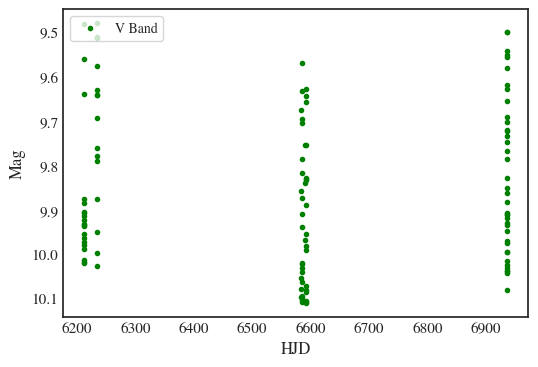

In [6]:
fig, ax = plt.subplots(figsize=(6,4))
#ax.scatter(t_hjd_b, mags_b, color='b', marker='.', label='B Band')
ax.scatter(t_hjd_w, mags_w, color='g', marker='.', label='V Band')
#ax.scatter(t_hjd_r, mags_r, color='r', marker='.', label='R Band')
#ax.set(ylim=(7.8,6.6))
for label in (ax.get_xticklabels() + ax.get_yticklabels()): label.set_fontsize(11)
ax.set_xlabel('HJD', fontsize=12)
ax.set_ylabel('Mag', fontsize=12)
ax.invert_yaxis()
ax.legend(frameon=True, loc='upper left')
#fig.savefig('apparent mag.jpg',dpi=300,bbox_inches='tight',pad_inches=0.1)

In [7]:
print(f'Magnitude in B-band is {round(np.min(mags_b),3)} - {round(np.max(mags_b),3)} \u00B1 {round(np.mean(mag_err_b),3)}')
print(f'Magnitude in V-band is {round(np.min(mags_v),3)} - {round(np.max(mags_v),3)} \u00B1 {round(np.mean(mag_err_v),3)}')
print(f'Magnitude in R-band is {round(np.min(mags_r),3)} - {round(np.max(mags_r),3)} \u00B1 {round(np.mean(mag_err_r),3)}')

Magnitude in B-band is 9.724 - 10.415 ± 0.002
Magnitude in V-band is 9.506 - 10.071 ± 0.002
Magnitude in R-band is 9.531 - 10.008 ± 0.002


In [8]:
#color index
b_v = (mags_b - mags_v) - 0.02
v_r = mags_v - mags_r
obs_bv = np.min(b_v)
obs_vr = np.mean(v_r)
print(f'the B - V is {round(obs_bv,3)}')
print(f'the V - R is {round(obs_vr,3)}')

the B - V is 0.135
the V - R is 0.048


In [9]:
#uncertainty of color index
sigma_bv = np.sqrt(mag_err_b**2 + mag_err_v**2)
sigma_vr = np.sqrt(mag_err_r**2 + mag_err_r**2)
np.mean(sigma_vr)

0.0030356509462401912

In [10]:
Teff = 4600 * ((1/((0.92*b_v)+1.7))+(1/((0.92*b_v)+0.62)))
print(f'The Maximum Effective Temperature of EH Lib is {round(np.max(Teff),0)} \u00B1 {round(np.std(Teff),0)} kelvin')
print(f'The Minimum Effective Temperature of EH Lib is {round(np.min(Teff),0)} \u00B1 {round(np.std(Teff),0)} kelvin')
print(f'The Effective Temperature of EH Lib is {round(np.mean(Teff),0)} \u00B1 {round(np.std(Teff),0)} kelvin')

The Maximum Effective Temperature of EH Lib is 8701.0 ± 394.0 kelvin
The Minimum Effective Temperature of EH Lib is 7053.0 ± 394.0 kelvin
The Effective Temperature of EH Lib is 7675.0 ± 394.0 kelvin


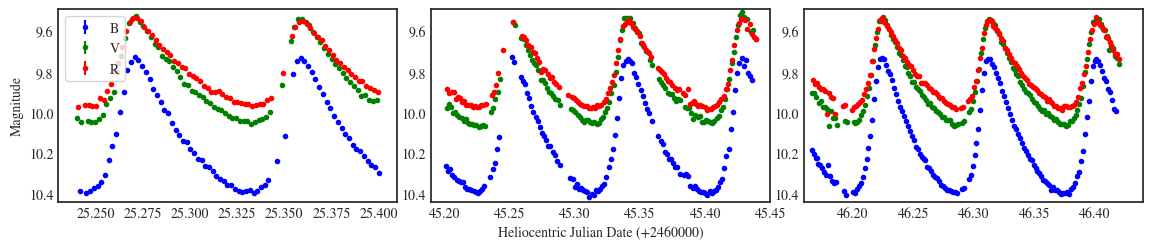

In [11]:
fig, ax2 = plt.subplots(1, 3, figsize=(14,2.5))
fig.subplots_adjust(wspace=0.1)
ax2[0].errorbar(t_hjd_b-2460000,mags_b, yerr=mag_err_b, color='b', fmt='.', label='B')
ax2[0].errorbar(t_hjd_v-2460000,mags_v, yerr=mag_err_v, color='g', fmt='.', label='V')
ax2[0].errorbar(t_hjd_r-2460000,mags_r, yerr=mag_err_r, color='r', fmt='.', label='R')
ax2[0].legend(loc='upper left',frameon=True)
ax2[0].set_xlim(25.23,25.41)
ax2[0].set_ylim(10.44,9.49)
ax2[1].errorbar(t_hjd_b-2460000,mags_b, yerr=mag_err_b, color='b', fmt='.',label='B')
ax2[1].errorbar(t_hjd_v-2460000,mags_v, yerr=mag_err_v, color='g', fmt='.', label='V')
ax2[1].errorbar(t_hjd_r-2460000,mags_r, yerr=mag_err_r, color='r', fmt='.', label='R')
ax2[1].set_xlim(45.19,45.45)
ax2[1].set_ylim(10.44,9.49)
ax2[0].set_ylabel('Magnitude')
ax2[2].errorbar(t_hjd_b-2460000, mags_b, yerr=mag_err_b, color='b', fmt='.', label='B')
ax2[2].errorbar(t_hjd_v-2460000, mags_v, yerr=mag_err_v, color='g', fmt='.', label='V')
ax2[2].errorbar(t_hjd_r-2460000, mags_r, yerr=mag_err_r, color='r', fmt='.', label='R')
ax2[2].set_xlim(46.16,46.44)
ax2[2].set_ylim(10.44,9.49)
ax2[1].set_xlabel('Heliocentric Julian Date (+2460000)')
fig.savefig('hasil pengamatan.png',dpi=300,bbox_inches='tight',pad_inches=0.1)

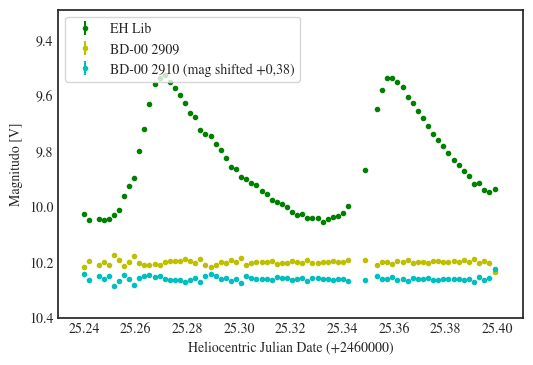

In [12]:
mags_comp = -2.5 * np.log10(flux_comp_v/flux_check_v) + 9.85
mags_check = -2.5 * np.log10(flux_check_v/flux_comp_v) + 10.23
mag_err_comp_v = -2.5 * np.log10 (1-(1/eh_v['Source_SNR_C2']))
mag_err_check_v = -2.5 * np.log10 (1-(1/eh_v['Source_SNR_C3']))
fig, ax = plt.subplots(figsize=(6,4))
ax.errorbar(t_hjd_v-2460000, mags_v, yerr=mag_err_v, color='g', fmt='.')
ax.errorbar(t_hjd_v-2460000, mags_comp, yerr=mag_err_comp_v, color='y', fmt='.')
ax.errorbar(t_hjd_v-2460000, mags_check+0.38, yerr=mag_err_check_v, color='c', fmt='.')
ax.set_xlim(25.23,25.41)
ax.set_ylim(10.4,9.29)
ax.legend(['EH Lib','BD-00 2909','BD-00 2910 (mag shifted +0,38)'], loc='upper left', frameon=True)
ax.set(xlabel='Heliocentric Julian Date (+2460000)', ylabel='Magnitudo [V]')
fig.savefig('target cek comp.png',dpi=300,bbox_inches='tight',pad_inches=0.1)

In [13]:
from astropy.timeseries import LombScargle
ls = LombScargle(t_hjd_v, mags_v, mag_err_v, nterms=3)
frequency, power = ls.autopower(normalization='model',samples_per_peak=100)
period_days = 1. / frequency
best_frequency = frequency[np.argmax(power)]
best_period = period_days[np.argmax(power)]
print("Best period: {0:.7f} days".format(best_period))
print("Best frequency: {0:.7f} c/d".format(best_frequency))

Best period: 0.0884129 days
Best frequency: 11.3105699 c/d


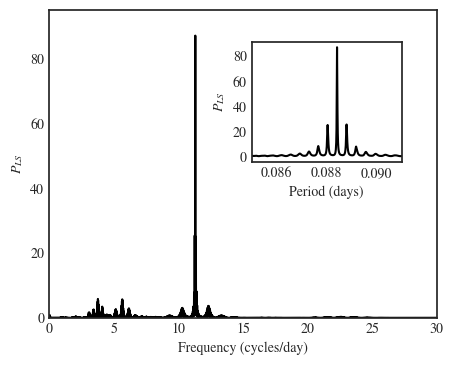

In [14]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(frequency, power, color='k')
ax.set(xlabel='Frequency (cycles/day)', ylabel='$P_{LS}$')
ax.yaxis.set_major_locator(plt.MultipleLocator(20))
ax.set_xlim(0,30)
ax.set_ylim(0,95)
inset = fig.add_axes([0.53, 0.5, 0.3, 0.3])
inset.plot(period_days, power, 'k')
inset.xaxis.set_major_locator(plt.MultipleLocator(0.002))
inset.yaxis.set_major_locator(plt.MultipleLocator(20))
inset.set(xlabel='Period (days)',
          ylabel='$P_{LS}$', xlim=(0.085,0.091))
plt.savefig('freq and per eh lib.png',dpi=300,bbox_inches='tight')

In [15]:
from astropy.timeseries import LombScargle
def compute_models(N):
    for nterms in range(1, N + 1):
        ls = LombScargle(t_hjd_v,mags_v,normalization='model', nterms=nterms)
        freq, power = ls.autopower(samples_per_peak=100)
        yield ls, freq, power
results = list(compute_models(3))
_, freq, power = results[2]
period_days = 1. / freq
best_freq = freq[np.argmax(power)]
best_period = period_days[np.argmax(power)]
print("Best period: {0:.7f} days".format(best_period))
print("Best frequency: {0:.7f} c/d".format(best_freq))

Best period: 0.0884129 days
Best frequency: 11.3105699 c/d


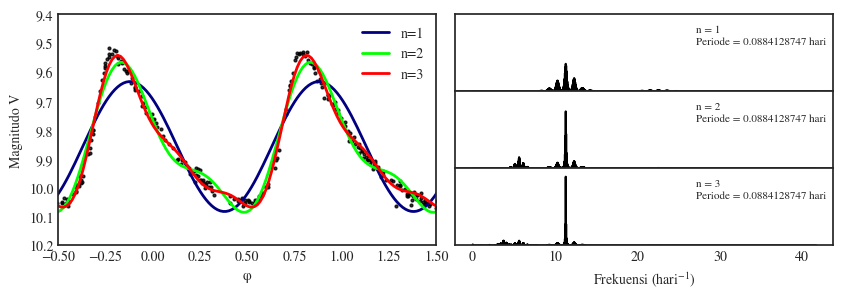

In [16]:
fig = plt.figure(figsize=(10, 3))
gs = plt.GridSpec(3, 2, wspace=0.05, hspace=0)

ax = fig.add_subplot(gs[:, 0])
phase = (t_hjd_v * best_freq) % 1 - np.random.randint(-1, 2, eh_v.shape[0])
flux = mags_v

ax.plot(phase, flux, 'ok', alpha=0.8, markersize=2, rasterized=True)

phase_fit = np.linspace(-1, 2, 200)
colors=['navy', 'lime', 'red']
for model, color in zip(results, colors):
    model = model[0]
    y_fit = model.model(phase_fit / best_freq, best_freq)
    ax.plot(phase_fit, y_fit, '-', lw=2, color=color,
            label='n={0}'.format(model.nterms))
ax.set(xlim=(-0.5,1.5), ylim=(10.2,9.4),
       xlabel='\u03C6', ylabel='Magnitudo V')
ax.legend(title=None)

ax = [fig.add_subplot(gs[i, 1]) for i in range(3)]

for axi, model in zip(ax, results):
    ls, freq, power = model
    axi.plot(freq, power, '-k', rasterized=True)
    axi.set(ylim=(0, power.max()+10))
    axi.yaxis.set_major_locator(plt.MultipleLocator(10))
    axi.yaxis.set_major_formatter(plt.NullFormatter())
    #axi.annotate(2.2, 80, 'n={0}'.format(ls.nterms),ha='right', va='top', size=12)
    axi.annotate("n = {0}".format(ls.nterms),xy=(0.72, 0.65), xycoords="axes fraction",
            xytext=(-5, 5), textcoords="offset points", ha="right", va="bottom", fontsize=8)
    axi.annotate("Periode = {:.10f} hari".format(best_period),xy=(1, 0.5), xycoords="axes fraction",
            xytext=(-5, 5), textcoords="offset points", ha="right", va="bottom", fontsize=8)
for axi in ax[:-1]:
    axi.xaxis.set_major_formatter(plt.NullFormatter())
ax[-1].set_xlabel(r'Frekuensi (${\rm hari}^{-1}$)')
#ax[-1].set_ylabel(r'$P_{LS}$')

#fig.suptitle('Multi-term Periodograms for EH Librae', size=12)

fig.savefig('multiterms for eh lib.png',dpi=300,bbox_inches='tight')

In [17]:
ls_lit = LombScargle(t_hjd_w, mags_w, normalization='model', nterms=3)
frequency_lit, power_lit = ls_lit.autopower(minimum_frequency=0.2, maximum_frequency=25)
period_days_lit = 1. / frequency_lit
best_frequency_lit = frequency_lit[np.argmax(power_lit)]
best_period_lit = period_days_lit[np.argmax(power_lit)]
print("Best period: {0:.10f} days".format(best_period_lit))
print("Best frequency: {0:.10f} c/d".format(best_frequency_lit))

Best period: 0.0884133530 days
Best frequency: 11.3105087206 c/d


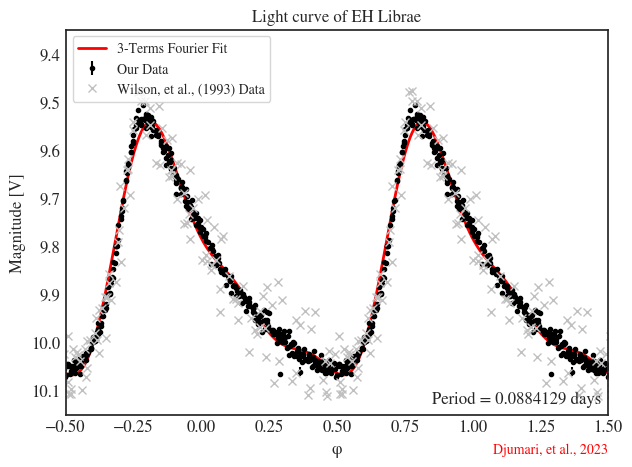

In [35]:
fig, ax = plt.subplots(figsize=(7, 5))
phase = (t_hjd_v / best_period) % 1
phase2 = (t_hjd_w / best_period_lit) % 1
phase_model = np.linspace(-1, 2, 1000)
mag_model = ls.model(phase_model / best_frequency, best_frequency)

for offset in [-1, 0, 1]:
    ax.errorbar(phase+offset, mags_v, mag_err_v, color='k',fmt='.', label='data')
    ax.errorbar(phase2+offset-0.35, mags_w, color='silver',fmt='x')
ax.plot(phase_model, mag_model, '-r', lw=2)
ax.set(xlim=(-0.5, 1.5), ylim=(10.15,9.35))
ax.legend(['3-Terms Fourier Fit','Our Data','Wilson, et al., (1993) Data'], loc='upper left', frameon=True)
plt.xlabel('\u03C6',fontsize=12)
plt.ylabel('Magnitude [V]',fontsize=12)
plt.title("Light curve of EH Librae")
ax.annotate("Period = {0:.7f} days".format(best_period), xy=(1, 0), xycoords="axes fraction",
            xytext=(-5, 5), textcoords="offset points", ha="right", va="bottom", fontsize=12,)
ax.text(1, -0.1, 'Djumari, et al., 2023',color='red',ha='right',transform=ax.transAxes)
#ax.annotate("Djumari, et al., 2023", xy=(0.1, -0.12), xycoords="axes fraction",
            #xytext=(-5, 5), textcoords="offset points", ha="right", va="bottom", fontsize=10,)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
  label.set_fontsize(12)
#ax.text(0.9, 0, 'Period = {0:.2f} days'.format(ril_period),color='black',ha='right',va='bottom',transform=ax.transAxes)
plt.savefig('eh lib lc plus wilson.png',dpi=500,bbox_inches='tight')

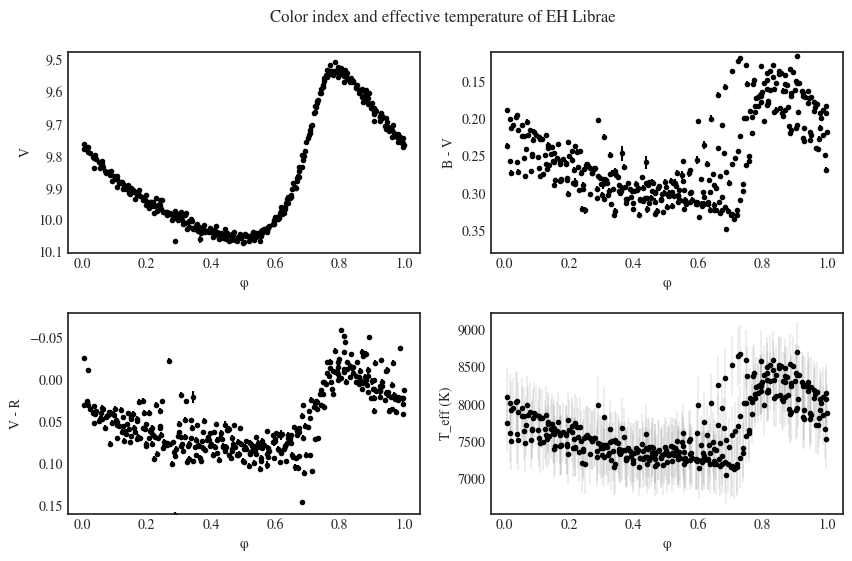

In [88]:
fig, axs = plt.subplots(2, 2, figsize=(10,6))
fig.subplots_adjust(hspace=0.3, wspace=0.2)
ebv = 0.02
m_bv = b_v - ebv 
m_vr = v_r
#plt.title("Color index and effective temperature of EH Librae")
axs[0,0].errorbar(phase, mags_v, mag_err_v,color='k', fmt='.')
axs[0,0].invert_yaxis()
axs[0,0].set(xlabel='\u03C6', ylabel='V')
axs[0,1].errorbar(phase,m_bv, yerr=sigma_bv, color='k', fmt='.')
axs[0,1].set(xlabel='\u03C6', ylabel='B - V')
axs[0,1].set_ylim(0.38,0.11)
axs[1,0].errorbar(phase, m_vr, yerr=sigma_vr, color='k', fmt='.')
axs[1,0].set(xlabel='\u03C6', ylabel='V - R')
axs[1,0].set_ylim(0.16,-0.08)
axs[1,1].errorbar(phase, Teff, yerr=np.std(Teff), color='k', fmt='.', ecolor='gray', elinewidth=0.2)
axs[1,1].set(xlabel='\u03C6', ylabel='T_eff (K)')
fig.suptitle('Color index and effective temperature of EH Librae',x=0.5,y=0.95,ha='center',va='top')
#ax.text(1, -0.1, 'Djumari, et al., 2023',color='red',ha='right',transform=ax.transAxes)
plt.savefig('b-v and v-r.png',dpi=600,bbox_inches='tight')

In [48]:
data = pd.read_excel('D:\Observational Data\photometry eh lib\data o-c.xlsx')
df = pd.DataFrame(data)
df

,Maxima (HJD),E,Referensi,Tahun
0,2.433439e+06,0.0,"Code, 1950",1950.0
1,2.433712e+06,3089.0,"Ashbrook, 1952",NaN
2,2.433738e+06,3383.0,"Ashbrook, 1953",NaN
3,2.433744e+06,3451.0,"Ashbrook, 1954",NaN
4,2.434486e+06,11841.0,"Alania, 1954",NaN
...,...,...,...,...
143,2.460045e+06,300936.0,"Djumari, 2023",NaN
144,2.460045e+06,300937.0,"Djumari, 2023",NaN
145,2.460046e+06,300946.0,"Djumari, 2023",NaN
146,2.460046e+06,300947.0,"Djumari, 2023",NaN


In [49]:
cal = 2433438.6076 +  0.0884132445 * df['E']
ominc = df['Maxima (HJD)'] - cal
df['O - C'] = ominc
df['O - C']

0      0.000000
1      0.000388
2     -0.000606
3      0.000293
4      0.009172
         ...   
143    0.005368
144    0.004355
145    0.005105
146    0.004255
147    0.005188
Name: O - C, Length: 148, dtype: float64

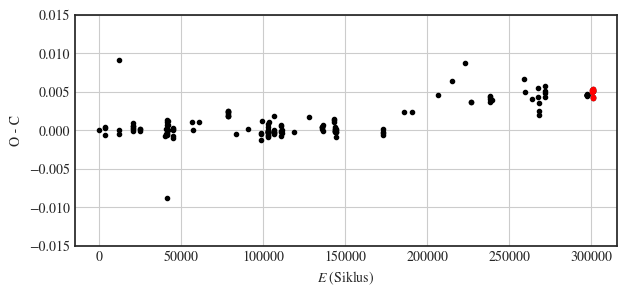

In [50]:
cyc = df['E']
hajede = df['Maxima (HJD)']
fig, ax = plt.subplots(figsize=(7,3))
ax.plot(df['E'], df['O - C'], 'k.')
ax.plot(cyc[140:148], ominc[140:148], 'r.')
ax.set(xlabel='$E$ (Siklus)', ylabel='O - C', ylim=(-0.015,0.015))
ax.grid()
#plt.savefig('o-c eh lib.jpg', dpi=300,bbox_inches='tight')

Gradient of the slope = 1.8398120995042147e-08
The y-intercept = -0.0010648122161253046


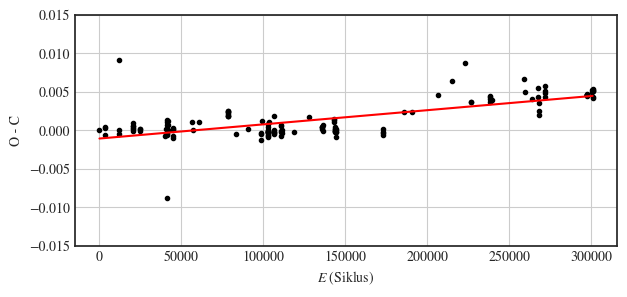

In [51]:
#linear regression for the transfer photon curve
from sklearn.linear_model import LinearRegression

#select mean counts as x and half variance as y
x = df['E'].values.reshape(-1,1)
y = df['O - C'].values.reshape(-1,1)

#fit the data
model = LinearRegression()
model.fit(x,y)
y_predict = model.predict(x)

#plot the data
fig, ax = plt.subplots(figsize=(7,3))
ax.scatter(x,y,c='k',marker='.')
ax.plot(x,y_predict,'r-')
ax.set(xlabel='$E$ (Siklus)', ylabel='O - C', ylim=(-0.015,0.015))
ax.grid()
#define the coefficient and intercept of y
coef_slope = model.coef_[0,0]
const_y = model.intercept_[0]

#print the results
print(f'Gradient of the slope = {coef_slope}')
print(f'The y-intercept = {const_y}')

#plt.savefig('o-c eh lib.jpg', dpi=300,bbox_inches='tight')

Gradient of the slope = 0.0884132629
The y-intercept = 2433438.6065



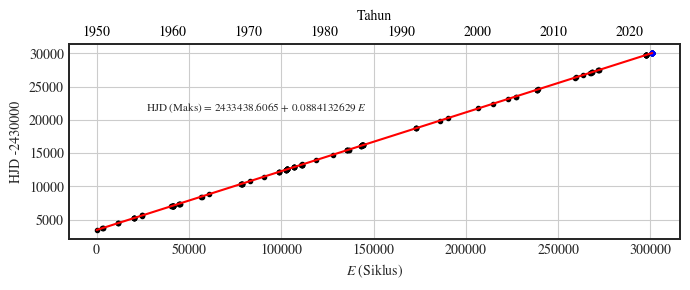

In [52]:
#linear regression for the transfer photon curve
#select mean counts as x and half variance as y
x1 = df['E'].values.reshape(-1,1)
y1 = df['Maxima (HJD)'].values.reshape(-1,1)

#fit the data
model_1 = LinearRegression()
model_1.fit(x1,y1)
y_predict_1 = model_1.predict(x1)

#plot the data
fig, ax = plt.subplots(figsize=(7,3))
ax.scatter(x1,y1-2430000,c='k',marker='.')
ax.scatter(x1[140:148],y1[140:148]-2430000,c='b',marker='.')
ax.plot(x1,y_predict_1-2430000,'r-')
ax.set(xlabel='$E$ (Siklus)', ylabel='HJD -2430000')
ax.grid()
ax2 = ax.twiny()  # instantiate a second axes that shares the same x-axis
color = 'black'
ax2.set_xlabel('Tahun', color=color)  # we already handled the x-label with ax1
ax2.plot(df['Tahun'], y1-2430000, color=color)
ax2.tick_params(axis='x', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#define the coefficient and intercept of y
coef_slope = model_1.coef_[0,0]
const_y = model_1.intercept_[0]
ax.annotate("HJD (Maks) = {0:.4f} + {1:.10f} $E$".format(const_y,coef_slope), xy=(0.5, 0.6), xycoords="axes fraction",
            xytext=(-5, 5), textcoords="offset points", ha="right", va="bottom", fontsize=8)
#print the results
print(f'Gradient of the slope = {np.round(coef_slope,10)}')
print(f'The y-intercept = {np.round(const_y,4)}')
print(f'')
plt.savefig('hjd vs cycle eh lib.jpg', dpi=300,bbox_inches='tight')

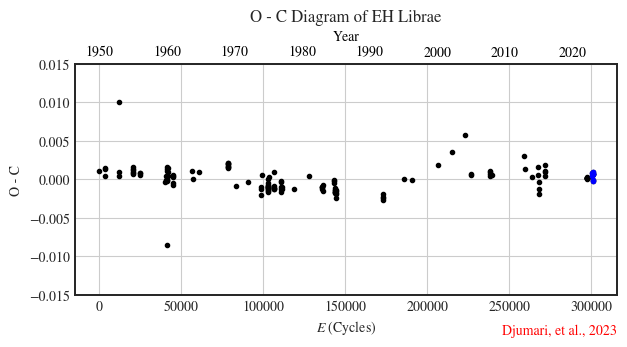

In [60]:
cal_new = const_y +  coef_slope * df['E']
df['O - C new'] = df['Maxima (HJD)'] - cal_new
x2 = df['E'].values.reshape(-1,1)
y2 = df['O - C new'].values.reshape(-1,1)
model_2 = LinearRegression()
model_2.fit(x2,y2)
y_predict_2 = model_2.predict(x2)
fig, ax = plt.subplots(figsize=(7,3))
ax.scatter(x2,y2,c='k',marker='.')
ax.scatter(x2[140:148],y2[140:148],c='b',marker='.')
#ax.plot(x2,y_predict_2,'r-')
ax.set(xlabel='$E$ (Cycles)', ylabel='O - C', ylim=(-0.015,0.015))
ax.grid()
ax2 = ax.twiny()  # instantiate a second axes that shares the same x-axis
color = 'black'
ax2.set_xlabel('Year', color=color)  # we already handled the x-label with ax1
ax2.plot(df['Tahun'], y1-2430000, color=color)
ax2.tick_params(axis='x', labelcolor=color)
plt.title("O - C Diagram of EH Librae")
ax.text(1, -0.17, 'Djumari, et al., 2023',color='red',ha='right',transform=ax.transAxes)
plt.savefig('o-c new eh lib.jpg', dpi=300,bbox_inches='tight')

In [54]:
data_new_b = {'HJD': t_hjd_b, 'Magnitudo': mags_b}
data_new_v = {'HJD': t_hjd_v, 'Magnitudo': mags_v}
data_new_r = {'HJD': t_hjd_r, 'Magnitudo': mags_r}
df_new_b = pd.DataFrame(data_new_b)
df_new_v = pd.DataFrame(data_new_v)
df_new_r = pd.DataFrame(data_new_r)
df_new_b.to_excel('filter b.xlsx')
df_new_v.to_excel('filter v.xlsx')
df_new_v.to_excel('filter r.xlsx')

In [55]:
ominc_neww = df['O - C new']
np.round(ominc_neww[140:148],4)

140    0.0008
141    0.0005
142    0.0006
143    0.0009
144   -0.0001
145    0.0006
146   -0.0002
147    0.0007
Name: O - C new, dtype: float64